## Importing required packages

In [54]:
import pandas as pd
import sys
import math

In [55]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [56]:
import sklearn as skl

## Import dataset

In [57]:
dataframe = pd.read_csv('Housing_Market_Typology_2011.csv')

In [58]:
dataframe.head(50)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
0,101001,Regional Choice,79,0.40,15.25,15225.00,0%,0%,0%,3%,$238000.00,78%
1,101002,Regional Choice,69,0.35,3.59,11975.00,1%,1%,1%,5%,$235000.00,69.4%
2,101003,Regional Choice,47,0.41,5.08,6100.00,0%,3%,0%,3%,$299000.00,78.6%
3,102001,Middle Market Choice,51,0.49,0.00,12300.00,1%,0%,2%,8%,$159900.00,68.8%
4,102002,Regional Choice,32,0.46,0.00,14100.00,0%,0%,2%,5%,$199694.00,77.2%
5,102003,Regional Choice,67,0.32,24577.62,16400.00,0%,0%,0%,3%,$230000.00,77.4%
6,102004,Middle Market Choice,33,0.48,0.00,5016.67,1%,0%,1%,7%,$143250.00,69.2%
7,103001,Regional Choice,54,0.42,12.93,2204.55,0%,3%,1%,4%,$232500.00,76.6%
8,103002,Regional Choice,87,0.46,22.04,22000.00,1%,0%,2%,6%,$189900.00,41.3%
9,104001,Regional Choice,61,0.38,1.61,8383.33,1%,1%,0%,3%,$200000.00,61.5%


In [59]:
dataframe.tail(50)

,blockGroup,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
660,2720011,Middle Market,20,0.32,13.69,5772.73,0%,2%,0%,4%,$106000.00,30.4%
661,2720012,Middle Market Choice,14,0.42,5.83,5911.11,1%,1%,1%,4%,$154250.00,44.5%
662,2720013,Middle Market Choice,7,0.36,10.34,3978.57,0%,2%,0%,4%,$131000.00,56.2%
663,2720014,Middle Market,8,0.51,3.52,8686.67,10%,5%,0%,4%,$107500.00,25.4%
664,2720021,Regional Choice,7,0.24,30.15,6626.32,0%,2%,0%,1%,$285000.00,40%
665,2720022,Regional Choice,13,0.47,72.29,2654.55,1%,1%,0%,2%,$240000.00,67.3%
666,2720023,Middle Market Choice,12,0.50,10.68,4636.36,1%,3%,0%,2%,$167500.00,61.7%
667,2201003,NR - Non-residential (<50 residential lots),0,0.00,0.00,0.00,0%,0%,0%,0%,$0.00,0%
668,2720024,< 5 Sales; MultiFamily (>65% of Housing Units),2,0.78,629.61,5735.71,0%,1%,0%,1%,$418500.00,30.3%
669,2720025,< 5 Sales; MultiFamily (>65% of Housing Units),2,0.10,0.00,10125.00,0%,0%,0%,0%,$102500.00,9.6%


In [60]:
dataframe.dtypes

blockGroup                          int64
marketCategory                     object
sales20092010                       int64
salesPriceCoefficientVariance     float64
commercialResidentialLandRatio    float64
unitsPerSquareMile                float64
residentialPermits                 object
vacantLots                         object
vacantHouseNotices                 object
foreclosureFilings                 object
medianSalesPrice20092010           object
ownerOccupied                      object
dtype: object

## Dataset Cleansing

##### Are blocks unique?

In [61]:
len(dataframe)==len(dataframe.drop_duplicates('blockGroup'))

True

##### Remove blockGroup column which is a unique row identifier

In [62]:
dataframe.drop('blockGroup', axis=1, inplace=True)

##### Remove the '%' from values in the columns {residentialPermits, vacantLots, vacantHouseNotices, foreclosureFilings, ownerOccupied} and cast to float datatype

In [63]:
dataframe['residentialPermits']=dataframe['residentialPermits'].replace( '[\%]','', regex=True ).astype(float)
dataframe['vacantLots']=dataframe['vacantLots'].replace( '[\%]','', regex=True ).astype(float)
dataframe['vacantHouseNotices']=dataframe['vacantHouseNotices'].replace( '[\%]','', regex=True ).astype(float)
dataframe['foreclosureFilings']=dataframe['foreclosureFilings'].replace( '[\%]','', regex=True ).astype(float)
dataframe['ownerOccupied']=dataframe['ownerOccupied'].replace( '[\%]','', regex=True ).astype(float)

##### Remove the dollar symbol from values in the column medianSalesPrice20092010 and cast to float datatype

In [64]:
dataframe['medianSalesPrice20092010']=dataframe['medianSalesPrice20092010'].replace( '[\$]','', regex=True ).astype(float)

##### Selecting marketCategory as the class label for the dataset. It labels each block per it's demand on the real estate market.

In [65]:
dataframe['marketCategory']=dataframe['marketCategory'].astype('category')

In [66]:
dataframe.dtypes

marketCategory                    category
sales20092010                        int64
salesPriceCoefficientVariance      float64
commercialResidentialLandRatio     float64
unitsPerSquareMile                 float64
residentialPermits                 float64
vacantLots                         float64
vacantHouseNotices                 float64
foreclosureFilings                 float64
medianSalesPrice20092010           float64
ownerOccupied                      float64
dtype: object

##### And look at that...we have exactly 10 features and 1 class label

##### Check if any column contains missing values

In [67]:
for column in dataframe.columns:
    print(column + ': ' + str(len(dataframe)<>len(dataframe[column].notnull())))

marketCategory: False
sales20092010: False
salesPriceCoefficientVariance : False
commercialResidentialLandRatio: False
unitsPerSquareMile: False
residentialPermits: False
vacantLots: False
vacantHouseNotices: False
foreclosureFilings: False
medianSalesPrice20092010: False
ownerOccupied: False


##### Check if any numeric columns contain negative values

In [68]:
for column in dataframe.columns[1:]:
    print(column + ': ' + str(len(dataframe.ix[dataframe[column]<0])>0))

sales20092010: False
salesPriceCoefficientVariance : False
commercialResidentialLandRatio: False
unitsPerSquareMile: False
residentialPermits: False
vacantLots: False
vacantHouseNotices: False
foreclosureFilings: False
medianSalesPrice20092010: False
ownerOccupied: False


## Analyze column ranges and other stats

##### Histogram for class labels to understand distibution of instances

In [69]:
dataframe.marketCategory.value_counts()

Distressed                                        209
Middle Market Choice                              117
Middle Market Stressed                            114
Regional Choice                                    94
Middle Market                                      92
< 5 Residential Sales (2009-2010)                  30
< 5 Sales; MultiFamily (>65% of Housing Units)     28
NR - Non-residential (<50 residential lots)        13
>50 residential lots; >40 % vacant lots             8
>50 residential lots; >50 % vacant lots             5
dtype: int64

##### Merging the tail end of market categories into a new, single category
The long tail looks like categories for areas where there aren't many sales (hypothesis: either because people dont like those blocks or there aren't many residential properties or residential properties aren't up for sale on the market). Merging all these low count categories into a single category 'Other' should eliminate the long tail.

In [70]:
dataframe.marketCategory.cat.add_categories('Other', inplace=True)

In [71]:
dataframe.marketCategory.cat.categories

Index([u'< 5 Residential Sales (2009-2010)',
       u'< 5 Sales; MultiFamily (>65% of Housing Units)',
       u'>50 residential lots; >40 % vacant lots',
       u'>50 residential lots; >50 % vacant lots', u'Distressed',
       u'Middle Market', u'Middle Market Choice', u'Middle Market Stressed',
       u'NR - Non-residential (<50 residential lots)', u'Regional Choice',
       u'Other'],
      dtype='object')

In [72]:
dataframe.marketCategory.replace({'< 5 Residential Sales (2009-2010)': 'Other', 
                              '< 5 Sales; MultiFamily (>65% of Housing Units)':'Other',
                             'NR - Non-residential (<50 residential lots)':'Other',
                             '>50 residential lots; >40 % vacant lots':'Other',
                             '>50 residential lots; >50 % vacant lots':'Other'}, inplace=True)

In [73]:
dataframe.marketCategory.cat.remove_unused_categories(inplace=True)

In [74]:
dataframe.marketCategory.value_counts()

Distressed                209
Middle Market Choice      117
Middle Market Stressed    114
Regional Choice            94
Middle Market              92
Other                      84
dtype: int64

##### Describe the numeric features in terms of mean, range (min and max) etc.

In [75]:
dataframe.describe()

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
count,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000,710.000000
mean,18.847887,0.602648,217.150817,5683.015211,0.616901,9.073239,7.405634,5.867606,96691.235211,48.385493
std,14.839127,0.307203,1668.778867,4703.420167,4.037867,12.361286,10.611167,17.069573,99209.184736,22.763382
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.410000,0.327500,2758.455000,0.000000,2.000000,0.000000,3.000000,26062.500000,33.100000
50%,16.000000,0.570000,4.155000,4807.145000,0.000000,5.000000,1.000000,5.000000,62992.500000,48.000000
75%,25.000000,0.807500,15.897500,7510.717500,0.000000,11.000000,12.750000,7.000000,135187.500000,65.400000
max,99.000000,1.760000,30761.430000,71300.000000,100.000000,92.000000,55.000000,450.000000,670000.000000,100.000000


##### Units per square mile shouldn't have zero value. Almost all columns have zero values for these blocks. We can eliminate these rows.

In [76]:
dataframe[dataframe.unitsPerSquareMile==0]

,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
143,Other,0,0,1.60,0,0,85,0,0,0,0
145,Other,0,0,0.36,0,0,0,0,0,0,0
159,Other,0,0,0.00,0,0,20,0,0,0,0
329,Other,0,0,0.00,0,0,92,0,0,0,0
493,Other,0,0,0.00,0,0,0,0,0,0,0
502,Other,0,0,0.00,0,0,71,0,0,0,0
667,Other,0,0,0.00,0,0,0,0,0,0,0
709,Other,0,0,0.00,0,0,0,0,0,0,0


In [77]:
rowIndicesToDelete = dataframe[dataframe.unitsPerSquareMile==0].index.get_values().tolist()
dataframe.drop(rowIndicesToDelete, inplace=True)

#####  Median sales price seems to have some zero values too. Turns out that's because those blocks haven't had any property sales...
##### so that's OK.

In [78]:
dataframe[dataframe.medianSalesPrice20092010==0]

,marketCategory,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
25,Other,0,0,0.89,3350.00,0,6,0,5,0,15.7
26,Other,0,0,0.24,9553.33,0,12,1,21,0,0.1
27,Other,0,0,0.09,483.33,0,14,1,0,0,4.4
28,Other,0,0,1.73,2390.91,2,15,0,0,0,0.0
29,Other,0,0,0.24,6.25,0,7,0,0,0,0.0
31,Other,0,0,0.00,4566.67,0,3,3,4,0,9.4
46,Other,0,0,0.78,7263.64,3,17,0,0,0,0.0
58,Other,0,0,0.00,3075.00,0,90,0,0,0,0.0
99,Other,0,0,0.00,2450.00,22,72,1,2,0,24.9
144,Other,0,0,208.94,71300.00,100,0,0,0,0,0.0


## Training the decision tree classifier

In [79]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [80]:
import numpy as np
dataframe = dataframe.reindex(np.random.permutation(dataframe.index))

In [81]:
X=dataframe.copy()
X.drop(['marketCategory'], axis=1, inplace=True)

In [82]:
le = preprocessing.LabelEncoder()
Y = le.fit_transform(dataframe['marketCategory'])
encodeValues = sorted(pd.unique(Y).tolist())
print(encodeValues)
le.inverse_transform(encodeValues)

[0, 1, 2, 3, 4, 5]


array(['Distressed', 'Middle Market', 'Middle Market Choice',
       'Middle Market Stressed', 'Other', 'Regional Choice'], dtype=object)

In [83]:
dt = DecisionTreeClassifier()
dt.fit(X.values, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [84]:
with open("dt.dot", 'w') as f:
    export_graphviz(dt, out_file=f, feature_names=X.columns)

In [85]:
import os
os.system('dot -Tpng dt.dot -o dt.png')

0

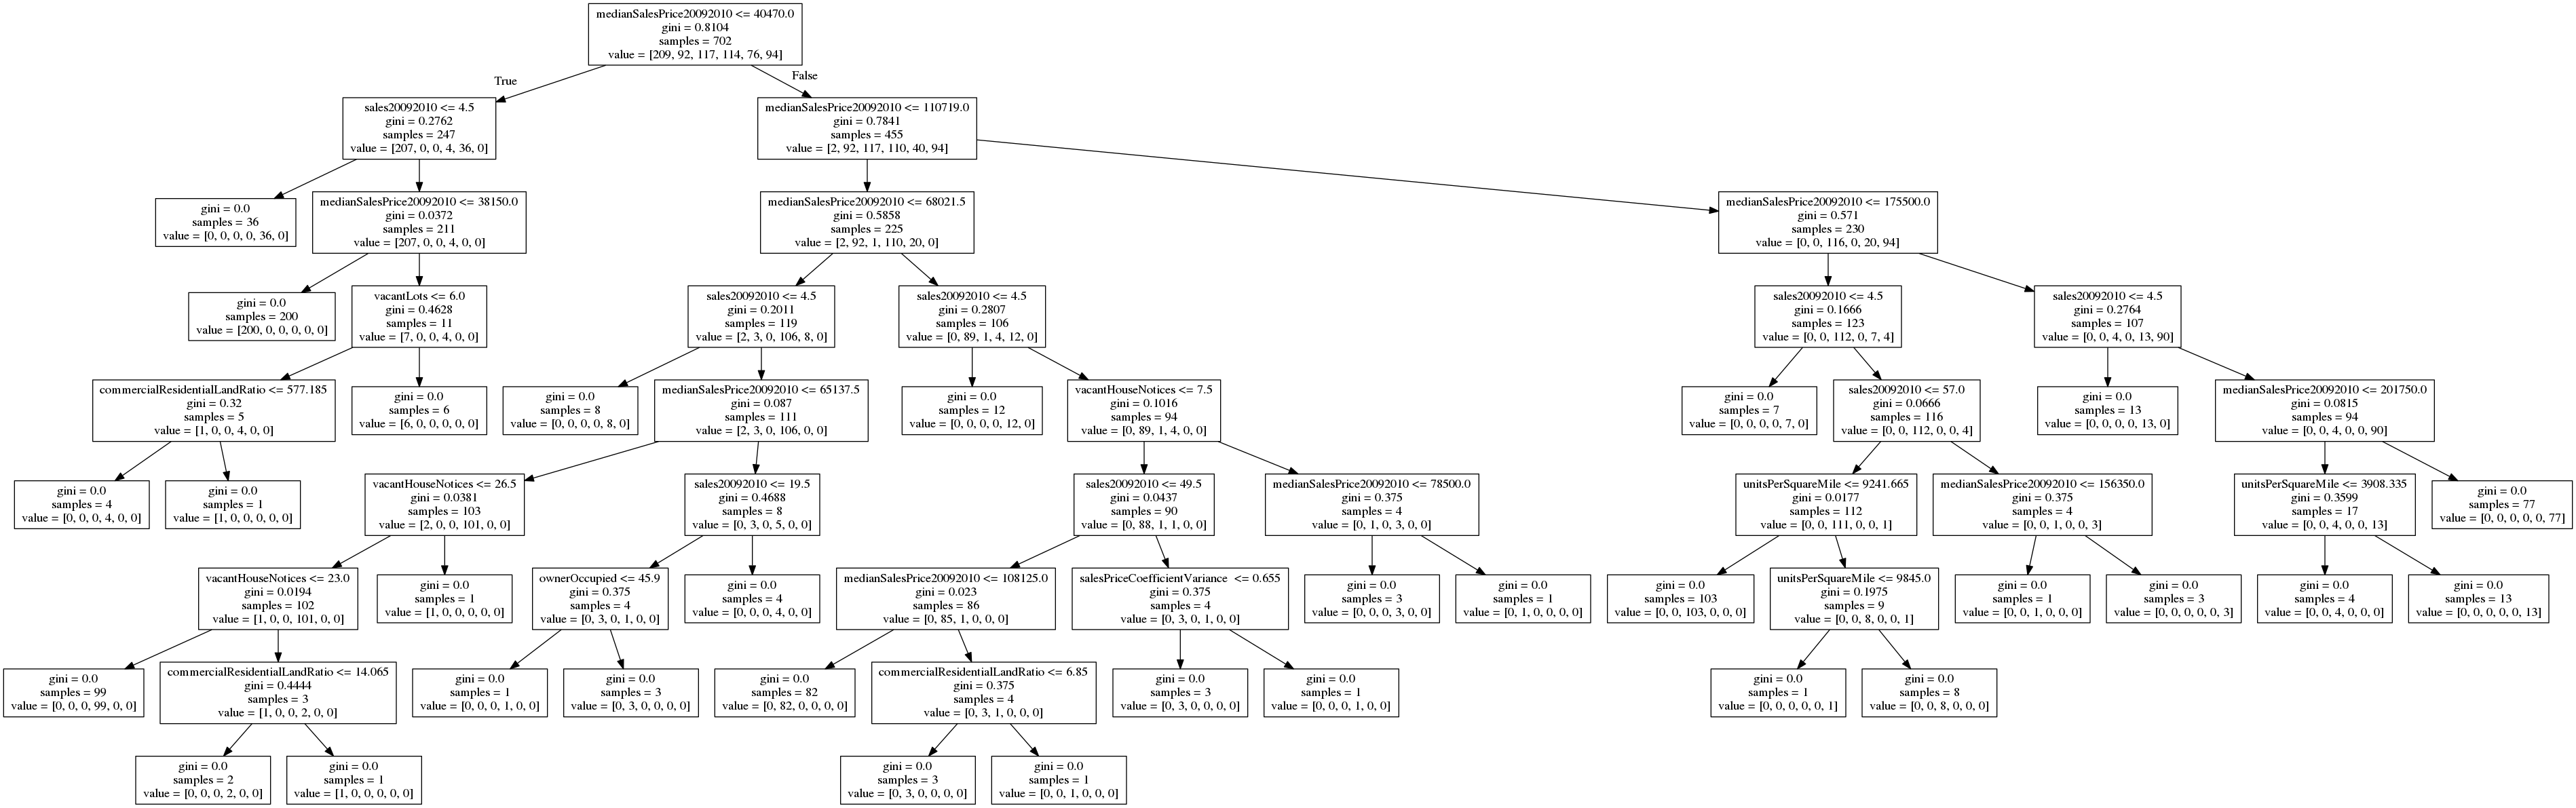

In [86]:
from IPython.display import Image
Image(filename='dt.png')

In [87]:
from sklearn import cross_validation
scores = cross_validation.cross_val_score(dt, X, Y, cv = 50)
scores

array([ 0.94117647,  0.88235294,  0.94117647,  0.94117647,  0.94117647,
        1.        ,  0.88235294,  0.94117647,  1.        ,  1.        ,
        1.        ,  0.9375    ,  0.9375    ,  1.        ,  0.93333333,
        1.        ,  0.93333333,  1.        ,  1.        ,  1.        ,
        0.92857143,  1.        ,  1.        ,  0.92857143,  1.        ,
        1.        ,  0.84615385,  0.92307692,  1.        ,  0.92307692,
        1.        ,  1.        ,  0.84615385,  1.        ,  1.        ,
        0.92307692,  1.        ,  0.84615385,  1.        ,  1.        ,
        0.92307692,  1.        ,  0.91666667,  0.91666667,  1.        ,
        0.90909091,  0.81818182,  1.        ,  1.        ,  0.90909091])

In [88]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.10)


In [89]:
correlationMatrix = X.corr()

In [90]:
((correlationMatrix > 0.4) & (correlationMatrix <1.0))  | ((correlationMatrix > -1.0) & (correlationMatrix < -0.4))

,sales20092010,salesPriceCoefficientVariance,commercialResidentialLandRatio,unitsPerSquareMile,residentialPermits,vacantLots,vacantHouseNotices,foreclosureFilings,medianSalesPrice20092010,ownerOccupied
sales20092010,False,False,False,False,False,False,False,False,False,False
salesPriceCoefficientVariance,False,False,False,False,False,False,True,False,True,False
commercialResidentialLandRatio,False,False,False,False,False,False,False,False,False,False
unitsPerSquareMile,False,False,False,False,True,False,False,False,False,False
residentialPermits,False,False,False,True,False,False,False,False,False,False
vacantLots,False,False,False,False,False,False,False,False,False,False
vacantHouseNotices,False,True,False,False,False,False,False,False,True,False
foreclosureFilings,False,False,False,False,False,False,False,False,False,False
medianSalesPrice20092010,False,True,False,False,False,False,True,False,False,False
ownerOccupied,False,False,False,False,False,False,False,False,False,False


In [91]:
dt.feature_importances_

array([ 0.2398727 ,  0.00263671,  0.00779293,  0.01423784,  0.        ,
        0.00613633,  0.01179285,  0.        ,  0.71489394,  0.00263671])

In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, dt.predict(X))

array([[209,   0,   0,   0,   0,   0],
       [  0,  92,   0,   0,   0,   0],
       [  0,   0, 117,   0,   0,   0],
       [  0,   0,   0, 114,   0,   0],
       [  0,   0,   0,   0,  76,   0],
       [  0,   0,   0,   0,   0,  94]])

## improving accuracy can be achieved by raising the n_fold accuracy or reducing the standard deviation...need to try this

In [93]:
X = X.loc[:,['sales20092010', 'medianSalesPrice20092010']]
X.columns

Index([u'sales20092010', u'medianSalesPrice20092010'], dtype='object')

asdfadf 